In [1]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Operator
sim = AerSimulator()

from util import zero, one, draw_vecs

# Appendix: Linear Algebra

We'll review the bare minimum of linear algebra needed for this series of notebooks. In particular, we will
1. introduce the concept of **vectors** as a data structure that encodes the quantum state of single and multi-qubit systems.
2. We will introduce **matrices** as a function that implements a quantum transformation.

## Vectors

From a programming perspective, we can think of a vector as a data structure (i.e., array) that has operations defined ($+$, $\cdot$) on it satisfying certain properties (e.g., $+$ and $\cdot$ distribute).

### Real Vectors

In [2]:
vec1 = np.array([1., 2.])   # D = 2
vec1

array([1., 2.])

In [3]:
vec1[0], vec1[1]

(np.float64(1.0), np.float64(2.0))

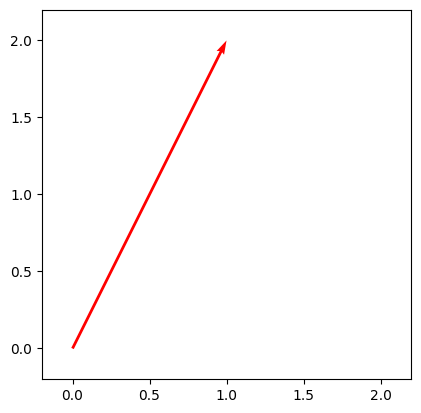

In [4]:
draw_vecs([vec1])

In [5]:
vec2 = np.array([2.3, 1.4])   # D = 2
vec2

array([2.3, 1.4])

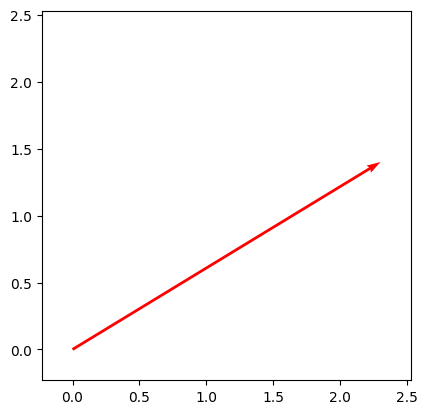

In [6]:
draw_vecs([vec2])

#### Operation 1: Vector Addition

1. Vectors are a "data structure".
2. The first operation we can perform on a vector is addition with another vector.

In [7]:
print("vec1", vec1)
print("vec2", vec2)
vec1 + vec2    # note the component-wise addition

vec1 [1. 2.]
vec2 [2.3 1.4]


array([3.3, 3.4])

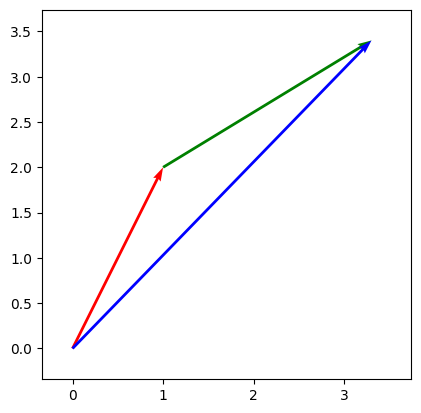

In [8]:
draw_vecs([vec1, (vec1, vec2), vec1 + vec2])

#### Operation 2: Scaling vector

1. The second operation we can perform on a vector is scaling with a number.

In [9]:
print(vec1)
.5*vec1

[1. 2.]


array([0.5, 1. ])

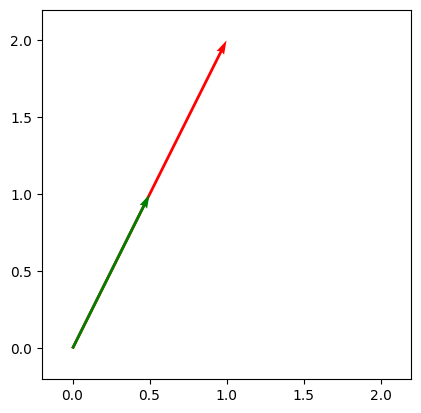

In [10]:
draw_vecs([vec1, .5*vec1])

#### Properties

1. Previously, we saw scaling and addition independently.
2. How do scaling and addition work with each other?

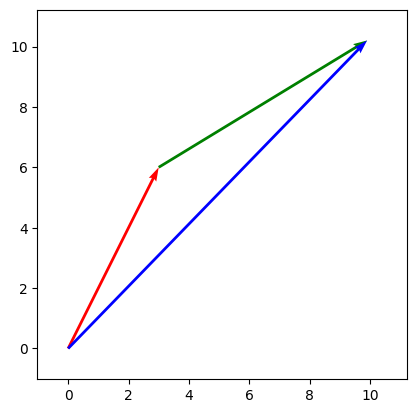

In [11]:
# 1: Multiplying first then adding
draw_vecs([3.*vec1, (3.*vec1, 3.*vec2), 3.*vec1 + 3.*vec2])

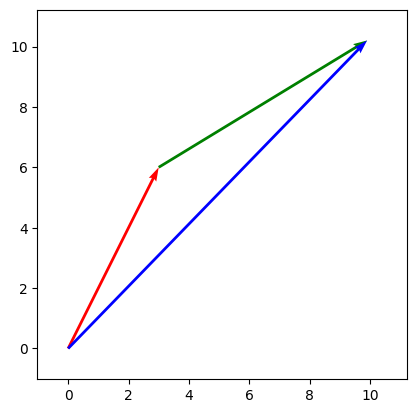

In [12]:
# 2: Adding then multiplying
draw_vecs([3.*vec1, (3.*vec1, 3.*vec2), 3.*(vec1 + vec2)])

### Summary

1. A **vector** is an array of numbers notated as

$$
x = \begin{pmatrix}
x_1 \\
\vdots \\
x_n
\end{pmatrix}
$$

where $x_i$ indicates the $i$-th number in the vector.

#### Operations

2. **Vector addition** is defined element-wise as

$$
\begin{pmatrix}
x_1 \\
\vdots \\
x_n
\end{pmatrix} + \begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix} = \begin{pmatrix}
x_1 + y_1 \\
\vdots \\
x_n + y_n
\end{pmatrix} \,.
$$

3. **Vector scaling** is defined element-wise as

$$
c \cdot \begin{pmatrix}
x_1 \\
\vdots \\
x_n
\end{pmatrix} = \begin{pmatrix}
cx_1 \\
\vdots \\
cx_n
\end{pmatrix} \,.
$$

#### Properties

Using the definition of addition and scaling, we can verify properties such as

4. distributivity: $c(x + y) = cx + cy$
5. associativity: $(x + y) + z= x + (y + z)$
6. commutativity: $x + y = y + x$

#### Aside: "Abstract Method"

1. In applied settings, we can largely work with vectors as arrays of numbers since we eventually hope to compute with them.
2. For theoretical purposes, we can think of vectors as any abstract set of elements that we can add and scale satisfying the rules above.

### Dot Product and Orthogonality

The **dot product** of two vectors $x$ and $y$ is defined as

$$
x \cdot y = \sum_{i} x_i y_i \,.
$$

In [13]:
np.dot([1., 2.], [2., 3.])

np.float64(8.0)

#### Orthogonality

Two vectors $x$ and $y$ are said to be **orthogonal** if $x \cdot y = 0$.

0.0


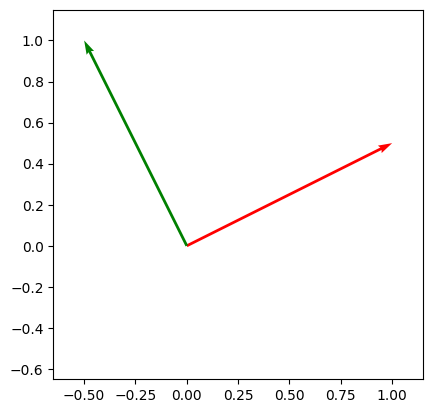

In [14]:
# Orthogonal
x = np.array([1.0, 0.5])
y = np.array([-.5, 1.])
print(np.dot(x, y))
draw_vecs([x, y])

-0.2


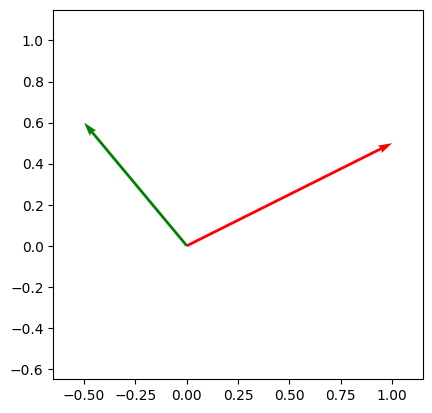

In [15]:
# Not Orthogonal
x = np.array([1.0, .5])
y = np.array([-.5, .6])
print(np.dot(x, y))
draw_vecs([x, y])

#### Norm

The euclidean **norm** measures the **length** of a vector.

$$
\lVert x \rVert = \sqrt{\sum_{i=1}^n x_i^2} = \sqrt{x \cdot x}
$$

In [16]:
np.linalg.norm(np.array([1., 2., 3.])), np.sqrt(1**2 + 2**2 + 3**2)

(np.float64(3.7416573867739413), np.float64(3.7416573867739413))

#### Dot Product and Angle

Let $\theta$ be the angle between $x$ and $y$. Then

$$
\cos(\theta) = \frac{x \cdot y}{\lVert x \rVert \lVert y \rVert} \,.
$$

Recall that two vectors are orthogonal when $\cos(\theta) = 0$, which means that $\theta$ is some integer multiple of $\pi/2$ so that they are at "right angles".

### Complex Vectors

In [17]:
ivec1 = np.array([1. + 1j, 2. - 3.1j])   # D = 2
ivec1

array([1.+1.j , 2.-3.1j])

In [18]:
ivec2 = np.array([- 1j, -2.])   # D = 2
ivec2

array([-0.-1.j, -2.+0.j])

#### Complex Vector Operations

In [19]:
ivec1 + ivec2

array([1.+0.j , 0.-3.1j])

In [20]:
3j * ivec1

array([-3. +3.j,  9.3+6.j])

#### Complex Norm

Let 

$$
\mathbf{z} = \begin{pmatrix}
z_1 \\
\vdots \\
z_n \\
\end{pmatrix} \,.
$$

Then

$$
\lVert \mathbf{z} \rVert = \sqrt{\sum_{i=1}^n z_i \bar{z_i}}
$$

In [21]:
np.linalg.norm(ivec2), np.sqrt(ivec2[0] * np.conjugate(ivec2[0]) + ivec2[1] * np.conjugate(ivec2[1]))

(np.float64(2.23606797749979), np.complex128(2.23606797749979+0j))

#### A Qubit is a 2D Complex Vector

Recall that a qubit was defined in terms of pairs of complex numbers

$$
|q\rangle = \{ \begin{pmatrix} a \\ b \end{pmatrix} \in \mathbb{C}^2, \sqrt{a\bar{a} + b\bar{b}} = 1\} \,.
$$

Thus a qubit can be equivalently defined as

$$
|q\rangle = \{ \mathbf{z} \in \mathbb{C}^2, \lVert \mathbf{z} \rVert = 1\} \,.
$$

## Matrices

1. Matrices are "functions" on vector data, i.e., the transform vectors into vectors.
2. Whereas we might write a typical function as code, matrices can be represented as a collection of numbers.

### Real Matrices

#### Example: 2x2 Matrix

$$
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
$$

In [22]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

#### Example: 2x3 Matrix

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
$$

In [23]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

#### Example: nxm Matrix

$$
\begin{pmatrix}
a_{11} & \dots & a_{1m} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nm}
\end{pmatrix}
$$

In [24]:
n = 3
m = 10
A = np.zeros((n, m))
A[2, 3] = 1
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

### Complex Matrices

We can also have complex matrices

$$
\begin{pmatrix}
j & -2 \\
0 & 3+2j
\end{pmatrix}
$$

In [25]:
C = np.array([
    [1j, -2],
    [0, 3 + 2j]
])
C

array([[ 0.+1.j, -2.+0.j],
       [ 0.+0.j,  3.+2.j]])

### Matrix Multiplication: View 1

$$
\begin{pmatrix}
a_{11} & \dots & a_{1m} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nm}
\end{pmatrix}
\begin{pmatrix}
b_{11} & \dots & b_{1k} \\
\vdots & \ddots & \vdots \\
b_{m1} & \dots & b_{mk}
\end{pmatrix} = 
\begin{pmatrix}
\sum_{i=1}^m a_{1i}b_{i1} & \dots & \sum_{i=1}^m a_{1i}b_{ik} \\
\vdots & \ddots & \vdots \\
\sum_{i=1}^m a_{ni}b_{i1} & \dots & \sum_{i=1}^m a_{ni}b_{ik}
\end{pmatrix}
$$

In [26]:
print(vec1)
np.array([[1, 2], [3, 4]]) @ vec1

[1. 2.]


array([ 5., 11.])

In [27]:
np.array([[1, 2], [3, 4]]) @ np.array([[1, 2], [3, 4]])

array([[ 7, 10],
       [15, 22]])

### Matrix Multiplication: View 2

Each column is a linear combination of the left matrix columns using the right matrix columns as the coefficients.

$$
\begin{pmatrix}
a_{11} & \dots & a_{1m} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nm}
\end{pmatrix}
\begin{pmatrix}
b_{1j} \\
\vdots \\ 
b_{mj}
\end{pmatrix} = 
\begin{pmatrix}
b_{1j}
\begin{pmatrix}
a_{11} \\
\vdots \\
a_{n1}
\end{pmatrix} +
\dots +
b_{mj}
\begin{pmatrix}
a_{1m} \\
\vdots \\
a_{nm}
\end{pmatrix}
\end{pmatrix}
$$

In [28]:
print(np.array([[1, 2], [3, 4]]) @ vec1)
print(np.array([1, 3]) * vec1[0] + np.array([2, 4]) * vec1[1])

[ 5. 11.]
[ 5. 11.]


In [29]:
print(np.array([[1, 2], [3, 4]]) @ np.array([[1, 2], [3, 4]]))
np.concatenate([(np.array([1, 3]) * 1 + np.array([2, 4]) * 3).reshape(2, -1),
                (np.array([1, 3]) * 2 + np.array([2, 4]) * 4).reshape(2, -1)], axis=1)

[[ 7 10]
 [15 22]]


array([[ 7, 10],
       [15, 22]])

### Matrix Multiplication is Linear

This means that

$$
A(c(x + y)) = cAx + cAy
$$

for any matrix $A$, constant $c$, and vectors $x$ and $y$.

In [30]:
def rotation_matrix(angle):
    theta = angle * np.pi/180
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ]) # 2x2 matrix
    return R

R = rotation_matrix(90)
R @ (2 * (vec1 + vec2)), 2 * R @ vec1 + 2 * R @ vec2

(array([-6.8,  6.6]), array([-6.8,  6.6]))

### Matrix Multiplication can be Sequenced

We can read the matrix multiplications

$$
B A x
$$

as
1. Apply $A$ to $x$
2. Then apply $B$ to the result of $Ax$.

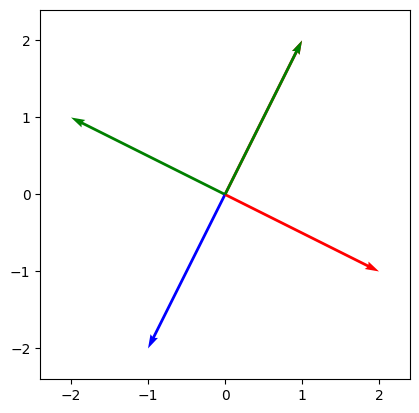

In [31]:
draw_vecs([vec1, R @ vec1 , R @ R @ vec1, R @ R @ R @ vec1, R @ R @ R @ R @ vec1])

## Matrix Inverse

$A^{-1}$ is called the **inverse** of $A$ if

$$
AA^{-1} = I = A^{-1}A
$$

where $I$ is an **identity** matrix, i.e., a matrix with 1s on the diagonal and 0s everywhere else.

1. Not every matrix has an inverse!
2. Interpretation of inverse of A: if A applies a linear transformation, then $A^{-1}$ undoes the transformation done by $A$, since $A^{-1}A$ is the identity which is the linear transformation that does nothing. 

In [32]:
R30 = rotation_matrix(30)
R30

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [33]:
np.linalg.inv(R30), np.linalg.inv(R30) @ R30

(array([[ 0.8660254,  0.5      ],
        [-0.5      ,  0.8660254]]),
 array([[1.00000000e+00, 7.43708407e-18],
        [6.29482353e-17, 1.00000000e+00]]))

In [34]:
# Inverse of rotation matrix is rotation in other direction
np.linalg.inv(R30), rotation_matrix(-30)

(array([[ 0.8660254,  0.5      ],
        [-0.5      ,  0.8660254]]),
 array([[ 0.8660254,  0.5      ],
        [-0.5      ,  0.8660254]]))

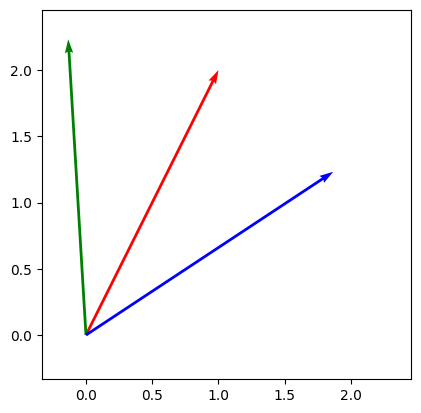

In [35]:
draw_vecs([vec1, R30 @ vec1, np.linalg.inv(R30) @ vec1])

### Quantum gates on single qubit systems are 2x2 Unitary Matrices

The **unitary matrix**

$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

encodes the Hadamard gate. We'll characterize unitary matrix later.

In [36]:
qc_H = QuantumCircuit(1)
qc_H.h(0)
qc_H.draw()

┌───┐
q: ┤ H ├
   └───┘

In [37]:
# This produces the unitary matrix
Operator(qc_H)

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


#### Application of gate to qubit is matrix multiplication

In [38]:
(zero.evolve(Operator(qc_H))).draw('latex')

<IPython.core.display.Latex object>

In [39]:
np.array(Operator(qc_H)) @ np.array(zero)

array([0.70710678+0.j, 0.70710678+0.j])

In [40]:
(one.evolve(Operator(qc_H))).draw('latex')

<IPython.core.display.Latex object>

In [41]:
np.array(Operator(qc_H)) @ np.array(one)

array([ 0.70710678+0.j, -0.70710678+0.j])

#### Sequencing gates corresponds to matrix multiplication

In [42]:
qc_H2 = QuantumCircuit(1)
qc_H2.h(0)
qc_H2.h(0)
qc_H2.draw()

┌───┐┌───┐
q: ┤ H ├┤ H ├
   └───┘└───┘

In [43]:
Operator(qc_H2)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [44]:
Operator(qc_H) @ Operator(qc_H)

Operator([[ 1.00000000e+00+0.j, -2.23711432e-17+0.j],
          [-2.23711432e-17+0.j,  1.00000000e+00+0.j]],
         input_dims=(2,), output_dims=(2,))


In [45]:
np.allclose(Operator(qc_H2), Operator(qc_H) @ Operator(qc_H))

True

#### Unitary matrix properties

Unitary matrices have two properties that are important for quantum computing.
1. Every unitary matrix is invertible. This coincides with our intuition in the single qubit case that every quantum operation on the Bloch sphere should be reversible.
2. Every unitary matrix preserves the norm of the input vector. In symbols,

$$
\lVert U x \rVert = \lVert x \rVert \,.
$$

This means that applying a quantum gate to a single qubit produces an output that is also a qubit.

In [46]:
# This demonstrates that H is its own inverse
Operator(qc_H) @ Operator(qc_H)

Operator([[ 1.00000000e+00+0.j, -2.23711432e-17+0.j],
          [-2.23711432e-17+0.j,  1.00000000e+00+0.j]],
         input_dims=(2,), output_dims=(2,))


In [47]:
# This demonstrates that H preserves the norm
np.linalg.norm(zero), np.linalg.norm(np.array(Operator(qc_H)) @ np.array(zero))

(np.float64(1.0), np.float64(0.9999999999999999))

## Summary

1. We had a crash course on linear algebra today and tied it back to the single qubit case
2. These concepts will be used throughout the course.
3. Next time, we will use linear algebra to begin to talk about multi-qubit systems.